In [1]:
using CSV, DataFrames, Plots, Statistics

In [2]:
cps = DataFrame(CSV.File("c:\\data\\Bounds\\cps.csv")) # <-change this to the right directory

## Cleaning zero wage

cps = cps[cps.wage .> 0, :]
first(cps,5)

Row,age,wage,educ
,Int64,Int64,String
1,22,12000,some college but no degree
2,21,3500,some college but no degree
3,49,30000,some college but no degree
4,31,32000,bachelor's degree
5,42,89630,doctorate degree


In [3]:
# Numerical value for education

#1.Creating a dictionary

educ_dict = Dict( 
    "grade 11" => 11, 
    "some college but no degree" => 13, 
    "associate's degree, academic program" => 14,
    "grade 10" => 10, 
    "grades 7 or 8" => 8, 
    "grades 1, 2, 3, or 4" => 4, 
    "associate's degree, occupational/vocational program" => 14, 
    "high school diploma or equivalent" => 12, 
    "grade 9" => 9, 
    "none or preschool" => 0, 
    "doctorate degree" => 21,
    "bachelor's degree" => 16, 
    "master's degree" => 14, 
    "grades 5 or 6" => 6, 
    "professional school degree" => 14, 
    "12th grade, no diploma" => 12
    );

In [4]:
#2. transforming cps.educ
f(x) = educ_dict[x]
cps.educ_num = f.(cps.educ)

#3. log of wage
cps.log_wage = log.(cps.wage)
first(cps,3)

Row,age,wage,educ,educ_num,log_wage
,Int64,Int64,String,Int64,Float64
1,22,12000,some college but no degree,13,9.39266
2,21,3500,some college but no degree,13,8.16052
3,49,30000,some college but no degree,13,10.309


In [5]:
Nobs, c = size(cps)
print("The original data contains ", Nobs, " observations and ",c, " columns.")

The original data contains 22715 observations and 5 columns.

In [6]:
wage_quantiles = quantile(cps[!,:wage],[0.0, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], sorted=false);
#wage_quantiles[1] +=-1
wage_quantiles[end] +=1

362303.0

In [7]:
lower(x) = wage_quantiles[sum(wage_quantiles .<=x)]
upper(x) = wage_quantiles[sum(wage_quantiles .<=x)+1]

cps.wage_lower = lower.(cps.wage)
cps.wage_upper = upper.(cps.wage)

cps.logwage_lower = log.(cps.wage_lower)
cps.logwage_upper = log.(cps.wage_upper)

first(cps,3)

Row,age,wage,educ,educ_num,log_wage,wage_lower,wage_upper,logwage_lower,logwage_upper
,Int64,Int64,String,Int64,Float64,Float64,Float64,Float64,Float64
1,22,12000,some college but no degree,13,9.39266,9000.0,15000.0,9.10498,9.61581
2,21,3500,some college but no degree,13,8.16052,1.0,9000.0,0.0,9.10498
3,49,30000,some college but no degree,13,10.309,30000.0,36000.0,10.309,10.4913


In [8]:
N = 40
df = cps[1:N,:]

Row,age,wage,educ,educ_num,log_wage,wage_lower,wage_upper,logwage_lower,logwage_upper
,Int64,Int64,String,Int64,Float64,Float64,Float64,Float64,Float64
1,22,12000,some college but no degree,13,9.39266,9000.0,15000.0,9.10498,9.61581
2,21,3500,some college but no degree,13,8.16052,1.0,9000.0,0.0,9.10498
3,49,30000,some college but no degree,13,10.309,30000.0,36000.0,10.309,10.4913
4,31,32000,bachelor's degree,16,10.3735,30000.0,36000.0,10.309,10.4913
5,42,89630,doctorate degree,21,11.4034,71000.0,362303.0,11.1704,12.8002
6,35,229339,doctorate degree,21,12.343,71000.0,362303.0,11.1704,12.8002
7,42,39000,high school diploma or equivalent,12,10.5713,36000.0,43277.8,10.4913,10.6754
8,48,50000,high school diploma or equivalent,12,10.8198,43277.8,53000.0,10.6754,10.878
9,41,37500,some college but no degree,13,10.5321,36000.0,43277.8,10.4913,10.6754


In [9]:
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,age,36.275,20,39.0,49,0,Int64
2,wage,53403.8,2500,36250.0,229339,0,Int64
3,educ,,"associate's degree, occupational/vocational program",,some college but no degree,0,String
4,educ_num,13.9,12,13.0,21,0,Int64
5,log_wage,10.4081,7.82405,10.498,12.343,0,Float64
6,wage_lower,34241.8,1.0,33000.0,71000.0,0,Float64
7,wage_upper,84537.1,9000.0,39638.9,362303.0,0,Float64
8,logwage_lower,9.3709,0.0,10.4001,11.1704,0,Float64
9,logwage_upper,10.7018,9.10498,10.5833,12.8002,0,Float64


In [10]:
include("C:\\Users\\arie\\OneDrive - University of Pittsburgh\\Bounds.jl\\src\\setBLP.jl")

Main.setBLP

In [11]:
using Main.setBLP

In [12]:
x = df[:,:age];
yl = df[:,:logwage_lower];
yu = df[:,:logwage_upper];
xyl = x.*yl;
xyu = x.*yu;

In [13]:
vl = Vertex([yl[1],xyl[1]])
vu = Vertex([yu[1],xyu[1]])
P = Polygon([vl,vu])
sortPolygon!(P)

for j = 2:N
    vl = Vertex([yl[j],xyl[j]])
    vu = Vertex([yu[j],xyu[j]])
    P0 = Polygon([vl,vu])
    sortPolygon!(P0)
    P +=P0
    sortPolygon!(P)
end

In [14]:
avgP = lambdaPolygon(P,1/N);

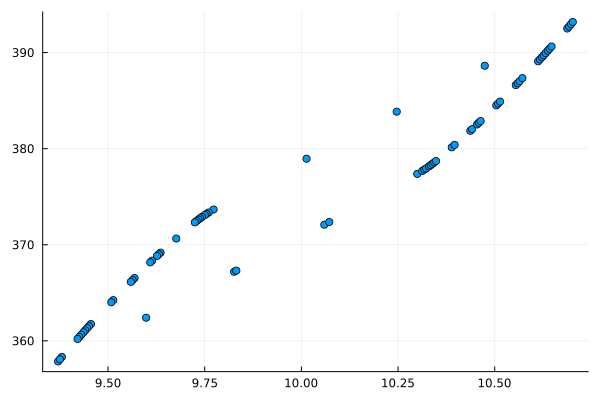

In [15]:
scatterPolygon(avgP)

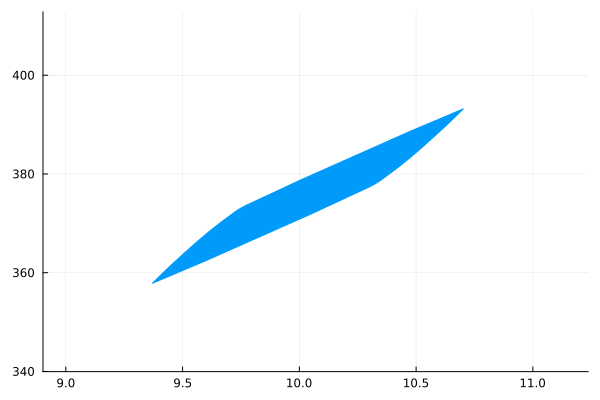

In [16]:
plotPolygon(avgP)

In [17]:
length(P.vertices)

74